# Week 8: Hypothesis Testing, Correlation vs. Causation

## DSUA111: Data Science for Everyone, NYU, Fall 2020

### TA Jeff, `jpj251@nyu.edu`

* This slideshow: https://jjacobs.me/dsua111-sections/week-08
* All materials: https://github.com/jpowerj/dsua111-sections

## Outline

0. Hypothesis Testing Overview
1. Testing Coins
2. Null vs. Alternative Hypotheses
3. Test Statistics
4. The Normal Distribution
5. Correlation vs. Causation

## Hypothesis Testing Overview

tl;dr
* If your theory was true, what would the data look like?
* Now compare that to the actual, **observed** data

## Testing Coins

Example: I walk up to you and say "Hey, wanna gamble? We'll each put in a dollar, then I'll flip this coin. Heads I get the \\$2, tails you get the \\$2"

* Xavier's Theory: I think the coin is fair. Heads and tails will come up **about the same** number of times
* Yasmin's Theory: I don't trust this guy, I think **heads will come up more often than tails**

"Suit yourself -- here, I'll let you flip it **100 times** and then draw your own conclusions about whether it's fair or not!"

What do the two theories predict in terms of the outcome of a series of coin flips?

In [1]:
x_predictions = [0.5, 0.5]
y_predictions = [0.4, 0.6]

import matplotlib.pyplot as plt
def plot_prediction(prediction, who):
    plt.bar([0,1], prediction)
    plt.ylim([0,1])
    plt.title(f"{who}'s coin flip prediction")
    plt.show()

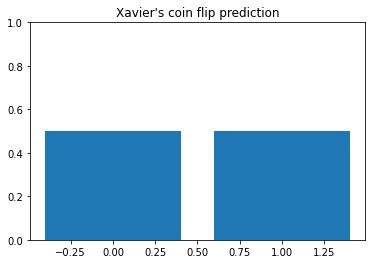

In [2]:
plot_prediction(x_predictions, "Xavier")

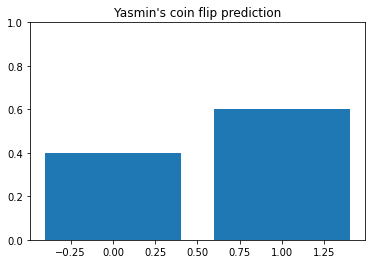

In [3]:
plot_prediction(y_predictions, "Yasmin")

* Data:

In [4]:
from collections import Counter
import pandas as pd
import numpy as np
import secret_coin
np.random.seed(123)

def do_coin_flips(N):
    coin_flips = np.array([secret_coin.flip() for i in range(N)])
    return coin_flips

def get_flip_distributions(x_predictions, y_predictions, results):
    flip_counter = Counter(results)
    flip_counts = np.array([flip_counter[0], flip_counter[1]]) / len(results)
    flip_df = pd.DataFrame({'outcome':["Tails","Heads"],'p':flip_counts,'which':['Actual outcome','Actual outcome']})
    x_pred_df = pd.DataFrame({'outcome':["Tails","Heads"],'p':x_predictions,'which':["Xavier's prediction","Xavier's prediction"]})
    y_pred_df = pd.DataFrame({'outcome':["Tails","Heads"],'p':y_predictions,'which':["Yasmin's prediction","Yasmin's prediction"]})
    full_df = pd.concat([flip_df, x_pred_df, y_pred_df]).reset_index()
    return full_df

In [5]:
flips_100 = do_coin_flips(100)
flips_100

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [6]:
dist_df = get_flip_distributions(x_predictions, y_predictions, flips_100)
dist_df

,index,outcome,p,which
0,0,Tails,0.38,Actual outcome
1,1,Heads,0.62,Actual outcome
2,0,Tails,0.50,Xavier's prediction
3,1,Heads,0.50,Xavier's prediction
4,0,Tails,0.40,Yasmin's prediction
5,1,Heads,0.60,Yasmin's prediction


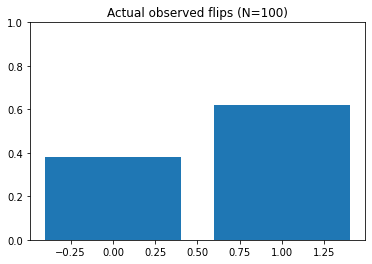

In [7]:
plt.bar([0,1], [dist_df.iloc[0]['p'],dist_df.iloc[1]['p']])
plt.title("Actual observed flips (N=100)")
plt.ylim([0,1])
plt.show()

But... **how** wrong is our prediction?

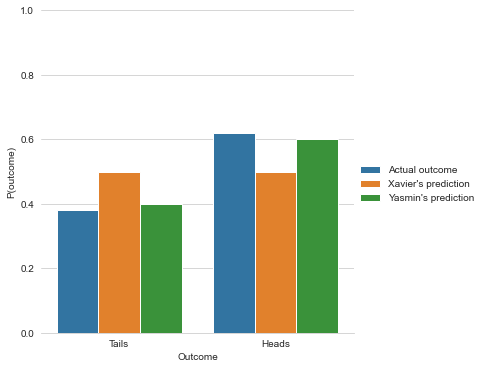

In [8]:
import seaborn as sns; sns.set_style("whitegrid")
def plot_distributions_a(dist_df):
    g = sns.catplot(data=dist_df, kind="bar",x="outcome", y="p", hue="which")
    g.despine(left=True)
    g.set_axis_labels("Outcome", "P(outcome)")
    g.legend.set_title("")
    g.set(ylim=(0,1))
plot_distributions_a(dist_df)

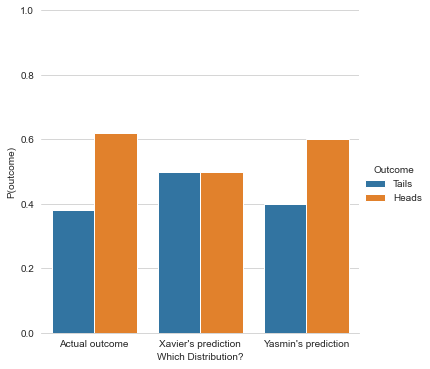

In [9]:
def plot_distributions_b(dist_df):
    g = sns.catplot(
        data=dist_df, kind="bar",
        x="which", y="p", hue="outcome"
    )
    g.despine(left=True)
    g.set_axis_labels("Which Distribution?", "P(outcome)")
    g.legend.set_title("Outcome")
    g.set(ylim=(0,1))
plot_distributions_b(dist_df)

Hmm... that actual outcome still looks kinda sketchy. Let's try one more time

In [10]:
flips_100_2 = do_coin_flips(100)
flips_100_2

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [11]:
dist_df2 = get_flip_distributions(x_predictions, y_predictions, flips_100_2)
dist_df2

,index,outcome,p,which
0,0,Tails,0.39,Actual outcome
1,1,Heads,0.61,Actual outcome
2,0,Tails,0.50,Xavier's prediction
3,1,Heads,0.50,Xavier's prediction
4,0,Tails,0.40,Yasmin's prediction
5,1,Heads,0.60,Yasmin's prediction


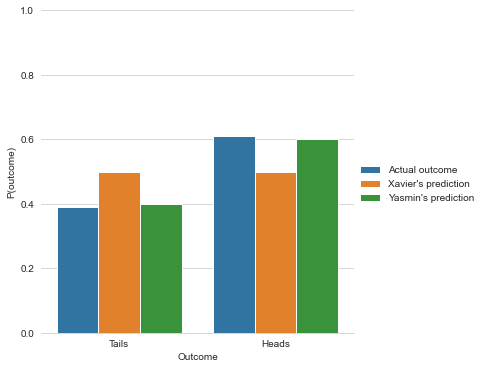

In [12]:
plot_distributions_a(dist_df2)

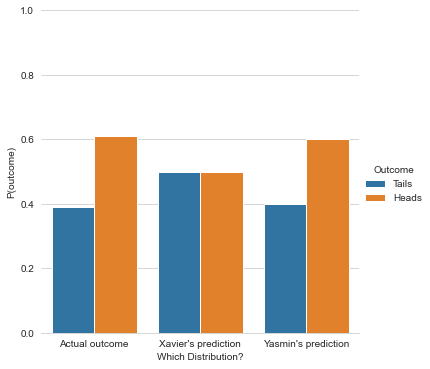

In [13]:
plot_distributions_b(dist_df2)

So, we need to **formalize** how to measure **how good or bad** a prediction is.

Enter... statistics!

## Null vs. Alternative Hypotheses

* **Null Hypothesis** ($H_0$): The skeptical hypothesis... "Nothing interesting is going on here, any patterns were simply due to chance"
    * The coin is not weird. $P(\text{heads}) = 0.5$
* **Alternative Hypothesis** ($H_A$): Something *other than* chance is generating the pattern we observe
    * The coin is loaded! $P(\text{heads}) \neq 0.5$

## ONLY TWO POSSIBLE CONCLUSIONS FROM YOUR HYPOTHESIS TEST

0. "We **reject** the null hypothesis"
    * if it seems sufficiently unlikely that the patterns in the data were produced simply due to chance
1. "We **fail to reject** the null hypothesis"
    * otherwise

## Test Statistic

* Computed from the **observed** data
* A measure of how reasonable our alternative hypothesis is for explaining this data
* I think of it like: a measure of "weirdness" -- should get larger the more "suspicious" the data is
* e.g., for a sequence of dice rolls, should be small if most sides come up ~1/6th of the time, but very high if only 6 ever comes up

## Unfair Coin Detection Statistic

* Idea: (number of heads) - (number of tails)

This is the number we were looking for before! It allows us to measure "unfairness" of the coin:

* Fair coins should produce test statistics close to 0 on average, while
* Coins biased towards heads will produce test statistics larger than 0 on average

## So, how bad were our coin flip predictions?

In [14]:
def test_stat_a(coin_flips):
    # Num heads - num tails
    num_heads = len([f for f in coin_flips if f == 1])
    num_tails = len([f for f in coin_flips if f == 0])
    return num_heads - num_tails

In [15]:
print(test_stat_a(do_coin_flips(100)))
print(test_stat_a(do_coin_flips(100)))

24
26


What would this test statistic look like if the coin was *actually* fair?

In [16]:
def fair_coin_flips(N):
    return np.array([np.random.binomial(1, 0.5) for i in range(N)])

In [17]:
print(test_stat_a(fair_coin_flips(100)))
print(test_stat_a(fair_coin_flips(100)))

-12
8


## Testing Procedure

* We'll consider a **trial** to be a sequence of $N=100$ coin flips.
* We'll perform **1000 trials** with a **fair** coin, and for each trial we'll record what the test statistic is
* Once we finish, we'll look at the **distribution** of test statistics that were generated from flips of the fair coin


In [18]:
test_stats = []
for trial_num in range(1000):
    test_stats.append(test_stat_a(fair_coin_flips(100)))
# Turn it into a NumPy array so we can do fancy math stuff with it
test_stats = np.array(test_stats)

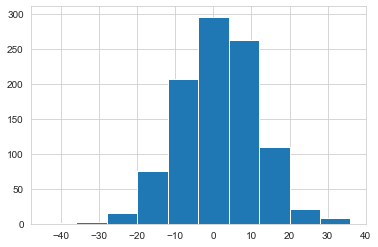

In [19]:
plt.hist(test_stats)
plt.show()

So... now we do 100 flips of our secret coin and see where it falls on this distribution!

In [20]:
secret_coin_results = do_coin_flips(100)

In [21]:
sc_stat = test_stat_a(secret_coin_results)
sc_stat

8

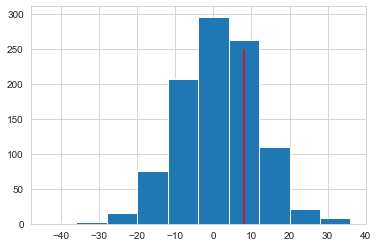

In [22]:
plt.hist(test_stats)
plt.vlines(sc_stat, 0, 250, color='red')
plt.show()

## p-values

* You should always have this plot in your head when thinking about **p-values**.
* The p-value is just the proportion of test statistics **generated from a true null hypothesis** (in this case, with a fair coin) that are as extreme or more extreme than the test statistic generated from the **observed data**
* In this case,

In [23]:
sum(test_stats >= sc_stat) / len(test_stats)

0.246

246 out of the 1000 trials of 100 *fair* coin flips, 24.6%, produced test statistics as extreme or more extreme than 8, so our **p-value** is 0.246

## Increasing the Sample Size

* As of now, the test statistic for our observed sequence of secret-coin flips seems like it could easily be generated by chance.
* If we want to be more confident, we'll need to increase the sample size. This time, let's consider a trial to be *500* coin flips, and re-do our testing procedure

In [24]:
test_stats_500 = []
for i in range(1000):
    coin_flips = fair_coin_flips(500)
    test_stat = test_stat_a(coin_flips)
    test_stats_500.append(test_stat)
test_stats_500 = np.array(test_stats_500)

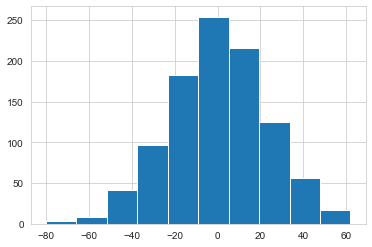

In [25]:
plt.hist(test_stats_500)
plt.show()

And now we do 500 flips of the secret coin, compute the test statistic for this sequence, and see where it lies on that histogram

In [26]:
secret_coin_results_500 = do_coin_flips(500)
sc_stat_500 = test_stat_a(secret_coin_results_500)
sc_stat_500

88

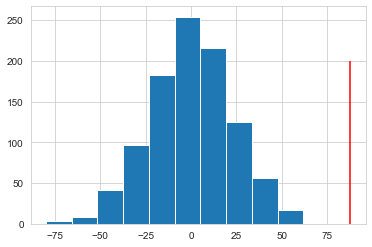

In [27]:
plt.hist(test_stats_500)
plt.vlines(sc_stat_500, 0, 200, color='red')
plt.show()

In [28]:
sum(test_stats_500 >= sc_stat_500) / len(test_stats_500)

0.0

Ok, **now** it looks suspicious -- the test statistic for the 500 secret coin flips is *way* higher than any test statistic produced by 500 flips of a known-fair coin

🤔🤔🤔

So our **p-value** here would be **0**: 0 out of the 1000 fair-coin trials produced test statistics this high or higher!

## Alternative Test Statistics

* Remember: the statistic we used is **not** the only possible test statistic!
* We *make up*/choose the test statistic that can best help us "detect" not-by-chance data

In [29]:
def test_stat_b(coin_flips):
    # The squared difference in predicted probabilities
    num_heads = len([f for f in coin_flips if f == 1])
    num_tails = len([f for f in coin_flips if f == 0])
    return (num_heads - num_tails) ** 2

In [30]:
test_stats_b = []
for trial_num in range(1000):
    test_stats_b.append(test_stat_b(fair_coin_flips(100)))
test_stats_b = np.array(test_stats_b)

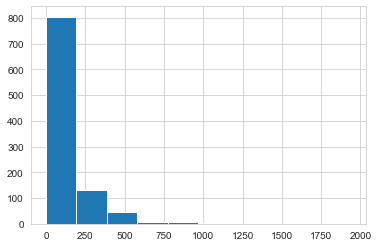

In [31]:
plt.hist(test_stats_b)
plt.show()

Now let's place our **observed** data on this plot

In [32]:
sc_stat_b = test_stat_b(secret_coin_results)
sc_stat_b

64

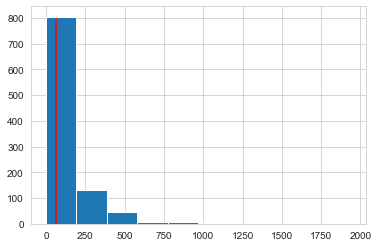

In [33]:
plt.hist(test_stats_b)
plt.vlines(sc_stat_b, 0, 800, color='red')
plt.show()

In [34]:
def test_stat_c(coin_flips):
    # 1 if it's within 5, 0 otherwise
    num_heads = len([f for f in coin_flips if f == 1])
    num_tails = len([f for f in coin_flips if f == 0])
    diff = abs(num_heads - num_tails)
    return 1 if diff <= 5 else 0

In [35]:
test_stats_c = []
for trial_num in range(1000):
    test_stats_c.append(test_stat_c(fair_coin_flips(100)))
test_stats_c = np.array(test_stats_c)

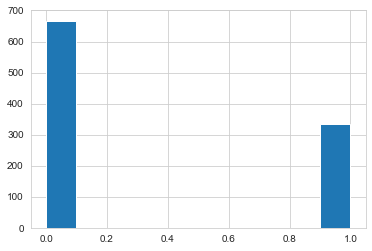

In [36]:
plt.hist(test_stats_c)
plt.show()

In [37]:
sc_stat_c = test_stat_c(secret_coin_results)
sc_stat_c

0

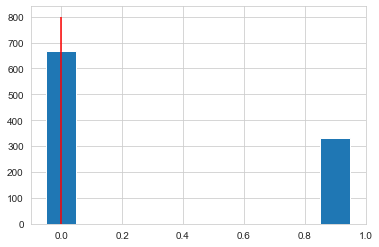

In [38]:
plt.hist(test_stats_c, align='left')
plt.vlines(sc_stat_c, 0, 800, color='red')
plt.show()

## The Normal Distribution

<img src="1000px-The_Normal_Distribution.svg.png" style="width:80%;">

Returning to our 100-flip test statistics, we can *see* "how normal" they are:

In [39]:
test_stat_zscores = (test_stats_500 - test_stats_500.mean()) / test_stats_500.std()

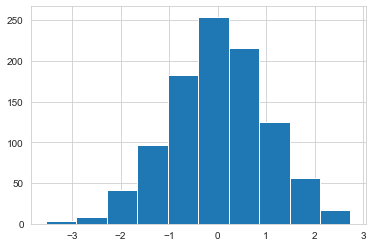

In [40]:
plt.hist(test_stat_zscores)
plt.show()

In [41]:
def print_std_dev_props(zscores):
    # Within 1 std dev
    for i in range(1,4):
        prop_within = len([ts for ts in zscores if (ts <= i) and (ts >= -i)]) / len(zscores)
        print(f"% within {i} standard deviations: {prop_within * 100}")

In [42]:
print_std_dev_props(test_stat_zscores)

% within 1 standard deviations: 69.69999999999999
% within 2 standard deviations: 95.1
% within 3 standard deviations: 99.7


Not always the case! Recall our alternative test stat (test stat B):

In [43]:
test_stat_zscores_b = (test_stats_b - test_stats_b.mean()) / test_stats_b.std()

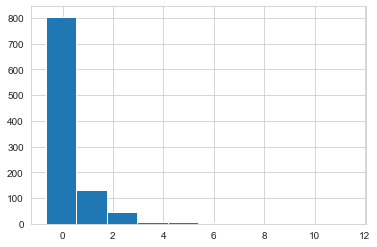

In [44]:
plt.hist(test_stat_zscores_b)
plt.show()

In [45]:
print_std_dev_props(test_stat_zscores_b)

% within 1 standard deviations: 91.2
% within 2 standard deviations: 95.7
% within 3 standard deviations: 98.2


## Correlation

<img src="covariance.png" style="width:80%;">

How do these test statistics penalize bad predictions?

In [46]:
prob_heads_predictions = [[i/100, (100-i)/100] for i in np.arange(0, 101)]

In [47]:
ts_a_vals = [test_stat_a(pred, np.array([0.5,0.5])) for pred in prob_heads_predictions]

TypeError: test_stat_a() takes 1 positional argument but 2 were given

In [ ]:
plt.bar(np.arange(0, 101), ts_a_vals)
plt.title("Test Statistic A Values")
plt.xlabel("# Heads Guess")
plt.ylabel("Test Statistic Value")
plt.show()

In [ ]:
ts_b_vals = [test_stat_b(pred, np.array([0.5,0.5])) for pred in prob_heads_predictions]

In [ ]:
plt.bar(np.arange(0, 101), ts_b_vals)
plt.title("Test Statistic B Values")
plt.xlabel("# Heads Guess")
plt.ylabel("Test Statistic Value")
plt.show()

In [ ]:
ts_c_vals = [test_stat_c(pred, np.array([0.5,0.5])) for pred in prob_heads_predictions]

In [ ]:
plt.bar(np.arange(0,101,1), ts_c_vals)
plt.title("Test Statistic C Values")
plt.xlabel("# Heads Guess")
plt.ylabel("Test Statistic Value")
#plt.fill_between(np.arange(0,1.01,0.01), ts_c_vals, interpolate=True)
plt.show()

In [ ]:
!jupyter nbconvert Week_08.ipynb --to slides --SlidesExporter.reveal_scroll=True